# Importing the Libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [169]:
adv = pd.read_csv(r'C:\Users\ADMIN\Desktop\DATASET.csv')
print("Data is successfully imported")

Data is successfully imported


In [170]:
#printing the shape of the dataset,i.e, number of rows and columns
adv.shape

(50000, 19)

In [171]:
t=adv[adv['clear_date'].isnull()]
t.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200743123,KROGER co,NaN,2020.0,1.930675e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,NaN,12901.28,20200320.0,NAA8,1.930675e+09,1
11,CA02,0140104409,LOB foundation,NaN,2020.0,2.960623e+09,2020-03-22,20200322,20200322,20200404.0,CAD,RV,1.0,NaN,127991.65,20200325.0,CA10,2.960623e+09,1
19,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930760e+09,2020-04-09,20200407,20200409,20200424.0,USD,RV,1.0,NaN,8972.85,20200409.0,NAH4,1.930760e+09,1
22,U001,0200793568,SUPE,NaN,2020.0,1.930898e+09,2020-05-13,20200513,20200513,20200528.0,USD,RV,1.0,NaN,3135.35,20200513.0,NAA8,1.930898e+09,1
24,U001,0200707822,PUBLI llc,NaN,2020.0,1.930856e+09,2020-05-05,20200503,20200505,20200520.0,USD,RV,1.0,NaN,135999.41,20200505.0,NAA8,1.930856e+09,1


In [172]:
dtf=adv[~adv['clear_date'].isnull()]

In [173]:
# Now printing the first 5 records.
dtf.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200792734,MDV/ foundation,2019-04-24 00:00:00,2019.0,1.929116e+09,2019-04-10,20190410,20190410,20190425.0,USD,RV,1.0,NaN,40457.06,20190410.0,NAA8,1.929116e+09,0
2,U001,0200561861,CO,2019-03-29 00:00:00,2019.0,1.928954e+09,2019-03-15,20190312,20190315,20190330.0,USD,RV,1.0,NaN,29386.60,20190315.0,NAA8,1.928954e+09,0
3,U001,0200729290,KROGER,2019-03-25 00:00:00,2019.0,1.928926e+09,2019-03-08,20190308,20190308,20190323.0,USD,RV,1.0,NaN,57149.53,20190308.0,NAA8,1.928926e+09,0
4,U001,200718130,SYSCO F corp,2019-07-17 00:00:00,2019.0,1.929527e+09,2019-06-26,20190621,20190626,20190716.0,USD,RV,1.0,NaN,15937.92,20190626.0,NAD1,1.929527e+09,0
5,U001,0200769623,WAL-MAR foundation,2019-11-19 00:00:00,2019.0,1.930130e+09,2019-11-09,20191108,20191109,20191124.0,USD,RV,1.0,NaN,24976.51,20191109.0,NAH4,1.930130e+09,0


In [174]:
dtf.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [175]:
dtf.nunique()

business_code                 6
cust_number                1340
name_customer              3850
clear_date                  402
buisness_year                 2
doc_id                    39121
posting_date                422
document_create_date        427
document_create_date.1      423
due_in_date                 494
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         35721
baseline_create_date        428
cust_payment_terms           73
invoice_id                39119
isOpen                        1
dtype: int64

# DATA PRE PROCESSING 

## REMOVING THE CONSTANT COLUMNS

In [176]:
unq_columns= [x for x in dtf.columns if dtf[x].nunique()==1] 
print(unq_columns)
dtf.drop(unq_columns, axis=1,inplace=True) 
dtf.columns

['posting_id', 'isOpen']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id'],
      dtype='object')

In [177]:
# dropping duplicate values
dtf = dtf.drop_duplicates()

In [178]:
dtf.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,area_business,total_open_amount,baseline_create_date,invoice_id
count,39121.000000,3.912100e+04,3.912100e+04,3.912100e+04,3.912100e+04,0.0,39121.000000,3.912100e+04,3.911900e+04
mean,2019.129470,2.013726e+09,2.019177e+07,2.019180e+07,2.019197e+07,NaN,32321.586117,2.019180e+07,2.013343e+09
std,0.335724,2.849605e+08,3.233665e+03,3.217791e+03,3.257132e+03,NaN,39779.168230,3.218920e+03,2.798948e+08
min,2019.000000,1.928502e+09,2.018123e+07,2.018102e+07,2.018110e+07,NaN,0.120000,2.018102e+07,1.928502e+09
25%,2019.000000,1.929181e+09,2.019041e+07,2.019041e+07,2.019043e+07,NaN,4821.600000,2.019041e+07,1.929181e+09
50%,2019.000000,1.929732e+09,2.019072e+07,2.019072e+07,2.019081e+07,NaN,17460.000000,2.019072e+07,1.929732e+09
75%,2019.000000,1.930205e+09,2.019103e+07,2.019103e+07,2.019111e+07,NaN,46713.470000,2.019103e+07,1.930205e+09
max,2020.000000,9.500000e+09,2.020023e+07,2.020023e+07,2.020061e+07,NaN,436972.430000,2.020030e+07,2.960617e+09


## CHANGING TO DATETIME FORMAT

In [179]:
dtf['clear_date']=pd.to_datetime(dtf['clear_date'])
dtf['due_in_date'] =  pd.to_datetime(dtf['due_in_date'], format = '%Y%m%d')
dtf['document_create_date.1'] =  pd.to_datetime(dtf['document_create_date.1'], format = '%Y%m%d')
dtf['document_create_date'] =  pd.to_datetime(dtf['document_create_date'], format = '%Y%m%d')
dtf['posting_date']=pd.to_datetime(dtf['posting_date'])
dtf['baseline_create_date']=pd.to_datetime(dtf['baseline_create_date'], format = '%Y%m%d')

CALCULATION OF DELAY VALUE

In [180]:
dtf['delay']=dtf['clear_date']-dtf['due_in_date']

<AxesSubplot:xlabel='delay', ylabel='Density'>

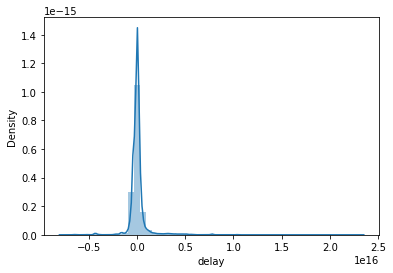

In [181]:
sns.distplot(dtf['delay'])
#Right skewed distribution plot of delay

REMOVING OUTLIERS

In [182]:
factor=3
upper_limit=dtf['delay'].mean()+dtf['delay'].std()*factor
lower_limit=dtf['delay'].mean()-dtf['delay'].std()*factor
dtf=dtf[(dtf['delay']<upper_limit)&(dtf['delay']>lower_limit)]

In [183]:
factor=3
upper_limit=dtf['total_open_amount'].mean()+dtf['total_open_amount'].std()*factor
lower_limit=dtf['total_open_amount'].mean()-dtf['total_open_amount'].std()*factor
dtf=dtf[(dtf['total_open_amount']<upper_limit)&(dtf['total_open_amount']>lower_limit)]

CHECKING FOR CORRELATION

In [184]:
correlation_dtf=dtf.corr()
print(correlation_dtf)

                   buisness_year    doc_id  area_business  total_open_amount  \
buisness_year           1.000000 -0.011288            NaN           0.010863   
doc_id                 -0.011288  1.000000            NaN           0.079065   
area_business                NaN       NaN            NaN                NaN   
total_open_amount       0.010863  0.079065            NaN           1.000000   
invoice_id             -0.011288  1.000000            NaN           0.079065   

                   invoice_id  
buisness_year       -0.011288  
doc_id               1.000000  
area_business             NaN  
total_open_amount    0.079065  
invoice_id           1.000000  


DROPPING ALL THE COLUMNS HAVING CORRELATION VALUE MORE THAN 0.95

In [185]:
dtf.drop(['invoice_id','doc_id','document type','area_business','document_create_date'], axis=1, inplace=True)

In [186]:
# checking the number of missing data
dtf.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
delay                     0
dtype: int64

In [187]:
dtf.dtypes

business_code                      object
cust_number                        object
name_customer                      object
clear_date                 datetime64[ns]
buisness_year                     float64
posting_date               datetime64[ns]
document_create_date.1     datetime64[ns]
due_in_date                datetime64[ns]
invoice_currency                   object
total_open_amount                 float64
baseline_create_date       datetime64[ns]
cust_payment_terms                 object
delay                     timedelta64[ns]
dtype: object

SORTING ON THE BASIS OF POSTING DATE

In [188]:
dtf.sort_values('posting_date',inplace=True)

In [189]:
dtf['delay']=dtf['delay'].dt.days

### PERFORMING LABEL ENCODING

In [190]:
from sklearn.preprocessing import LabelEncoder
Business_encoder = LabelEncoder()
Business_encoder.fit(dtf['business_code'])
dtf['business_code_enc'] = Business_encoder.transform(dtf['business_code'])
Custnum_encoder = LabelEncoder()
Custnum_encoder.fit(dtf['cust_number'])
dtf['cust_number_enc'] = Custnum_encoder.transform(dtf['cust_number'])
Custname_encoder = LabelEncoder()
Custname_encoder.fit(dtf['name_customer'])
dtf['name_customer_enc'] = Custname_encoder.transform(dtf['name_customer'])
Custname_pay_encoder = LabelEncoder()
Custname_pay_encoder.fit(dtf['cust_payment_terms'])
dtf['cust_payment_terms_enc'] = Custname_pay_encoder.transform(dtf['cust_payment_terms'])

In [191]:
dtf.drop(['name_customer','business_code','cust_number','invoice_currency'],axis=1,inplace=True)

## SPLITTING INTO TRAIN,VALIDATION AND TEST SET

In [192]:
# X has dataframe and no delay
X = dtf.drop('delay',axis=1)
# only target value is present in y 
y = dtf['delay']

In [193]:
# Data is splitted into 2 parts,70:30 split and 30% is fed to the intermediate test dataset
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [194]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

## EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='delay', ylabel='Density'>

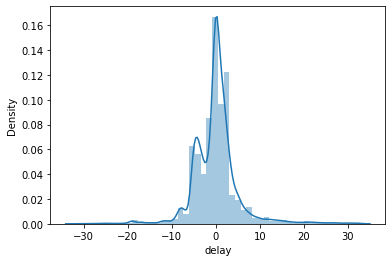

In [195]:
# distribution of the target column 
# Nearly normal distribution
# outliers present but not that significant   
sns.distplot(y_train)

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

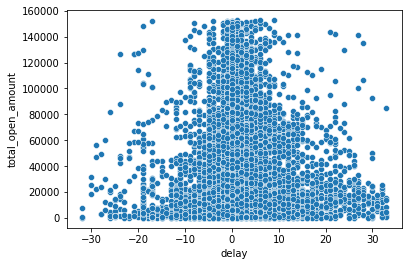

In [196]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")
# scatterplot between delay and total_open_amount

<AxesSubplot:xlabel='posting_date'>

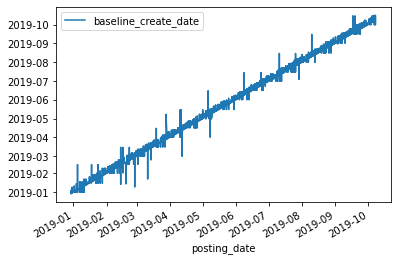

In [197]:
X_train.plot.line(x="posting_date",y="baseline_create_date")
#Highly correlated

In [198]:
X_train['posting_date'].dt.day.corr(X_train['baseline_create_date'].dt.day)

0.9483110351715426

In [199]:
#Dropping baseline_create_date since it is highly correlated with posting_date
X_train.drop(['baseline_create_date'], axis=1, inplace=True)
X_val.drop(['baseline_create_date'], axis=1, inplace=True)
X_test.drop(['baseline_create_date'], axis=1, inplace=True)

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

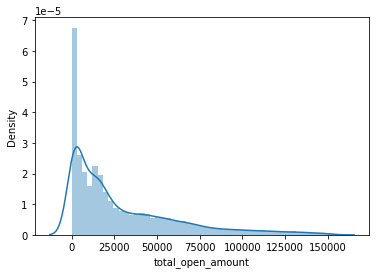

In [200]:
sns.distplot(X_train['total_open_amount'])

## FEATURE ENGINEERING

GENERATING MORE FEATURES FROM THE GIVEN DATASET

In [201]:
X_train['pos_day']=X_train['posting_date'].dt.day
X_train['pos_month']=X_train['posting_date'].dt.month
X_train['pos_year']=X_train['posting_date'].dt.year
X_train['pos_quarter']=X_train['posting_date'].dt.quarter
X_train['due_day']=X_train['due_in_date'].dt.day
X_train['due_month']=X_train['due_in_date'].dt.month
X_train['due_year']=X_train['due_in_date'].dt.year

In [202]:
X_val['pos_day']=X_val['posting_date'].dt.day
X_val['pos_month']=X_val['posting_date'].dt.month
X_val['pos_year']=X_val['posting_date'].dt.year
X_val['pos_quarter']=X_val['posting_date'].dt.quarter
X_val['due_day']=X_val['due_in_date'].dt.day
X_val['due_month']=X_val['due_in_date'].dt.month
X_val['due_year']=X_val['due_in_date'].dt.year

In [203]:
X_test['pos_day']=X_test['posting_date'].dt.day
X_test['pos_month']=X_test['posting_date'].dt.month
X_test['pos_year']=X_test['posting_date'].dt.year
X_test['pos_quarter']=X_test['posting_date'].dt.quarter
X_test['due_day']=X_test['due_in_date'].dt.day
X_test['due_month']=X_test['due_in_date'].dt.month
X_test['due_year']=X_test['due_in_date'].dt.year

Text(0.5, 1.0, 'Heatmap of Correlation')

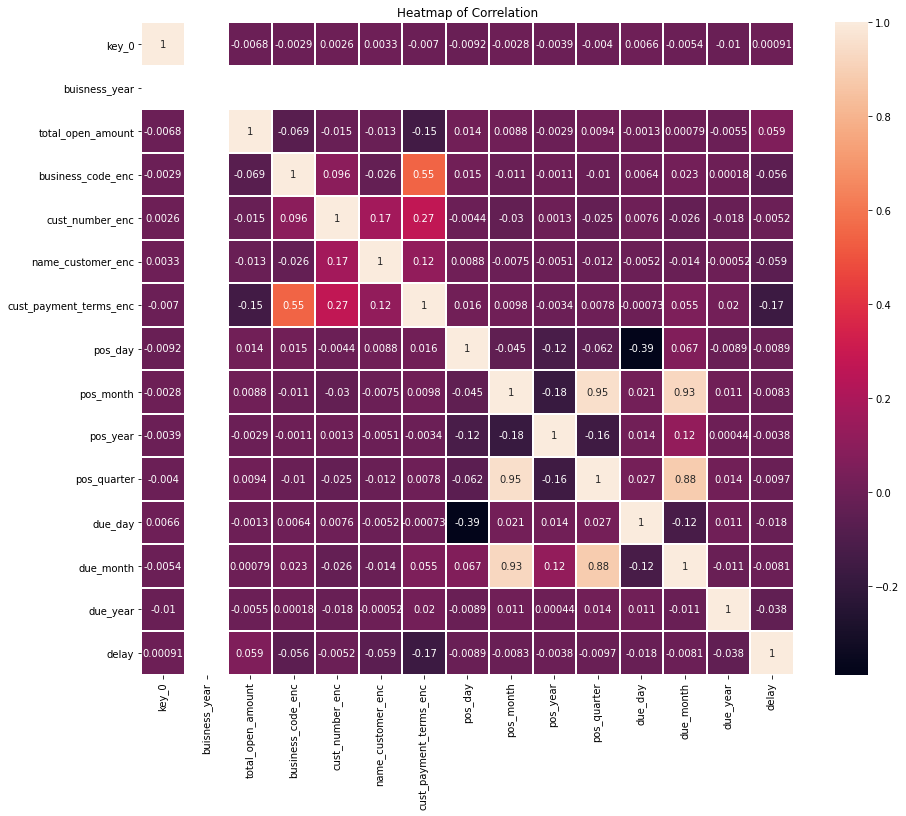

In [204]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train.merge(y_train,on=X_train.index).corr(),linewidths=0.1,vmax=1,linecolor='white',square=True,annot=True)
plt.title("Heatmap of Correlation")

In [205]:
X_train.drop(['posting_date','clear_date'],axis=1,inplace=True)
X_val.drop(['posting_date','clear_date'],axis=1,inplace=True)
X_test.drop(['posting_date','clear_date'],axis=1,inplace=True)

In [206]:
Due_date=X_train["due_in_date"]

X_train.drop(['document_create_date.1','due_in_date'],axis=1,inplace=True)
X_val.drop(['document_create_date.1','due_in_date'],axis=1,inplace=True)
X_test.drop(['document_create_date.1','due_in_date'],axis=1,inplace=True)

X_train.drop(['name_customer_enc'],axis=1,inplace=True)
X_val.drop(['name_customer_enc'],axis=1,inplace=True)
X_test.drop(['name_customer_enc'],axis=1,inplace=True)

X_train.drop(['business_code_enc'],axis=1,inplace=True)
X_val.drop(['business_code_enc'],axis=1,inplace=True)
X_test.drop(['business_code_enc'],axis=1,inplace=True)

X_train.drop(['due_year'],axis=1,inplace=True)
X_val.drop(['due_year'],axis=1,inplace=True)
X_test.drop(['due_year'],axis=1,inplace=True)

X_train.drop(['pos_quarter'],axis=1,inplace=True)
X_val.drop(['pos_quarter'],axis=1,inplace=True)
X_test.drop(['pos_quarter'],axis=1,inplace=True)

X_train.drop(['pos_day'],axis=1,inplace=True)
X_val.drop(['pos_day'],axis=1,inplace=True)
X_test.drop(['pos_day'],axis=1,inplace=True)

X_train.drop(['pos_month'],axis=1,inplace=True)
X_val.drop(['pos_month'],axis=1,inplace=True)
X_test.drop(['pos_month'],axis=1,inplace=True)

X_train.drop(['due_month'],axis=1,inplace=True)
X_val.drop(['due_month'],axis=1,inplace=True)
X_test.drop(['due_month'],axis=1,inplace=True)

X_train.drop(['cust_payment_terms'],axis=1,inplace=True)
X_val.drop(['cust_payment_terms'],axis=1,inplace=True)
X_test.drop(['cust_payment_terms'],axis=1,inplace=True)


In [207]:
X_train.dtypes

buisness_year             float64
total_open_amount         float64
cust_number_enc             int32
cust_payment_terms_enc      int32
pos_year                    int64
due_day                     int64
dtype: object

### NOW ALL THE FEATURES ARE IN INT, FLOAT SO PASSING THEM TO THE MODEL

# MODEL CREATION

### USING BASIC MODEL OF LINEAR REGRESSION

In [208]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)
y_predict = base_model.predict(X_val)

In [209]:
#CALCULATING MEAN SQUARED ERROR 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict)

28.522743376687497

### USING DECISION TREE WITH HYPERPARAMETER TUNING

In [210]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=6,max_depth=5)
regressor.fit(X_train,y_train)
y_predict2=regressor.predict(X_val)

In [211]:
#CALCULATING MEAN SQUARED ERROR 
mean_squared_error(y_val,y_predict2)

19.540498610145317

In [212]:
#CALCULATING R2 SCORE VALUE
from sklearn.metrics import r2_score
r2_score(y_val, y_predict2)

0.33762618271678324

### USING RANDOM FOREST WITH HYPERPARAMETER TUNING

In [213]:
from sklearn.metrics import r2_score
from sklearn.ensemble import  RandomForestRegressor
random=RandomForestRegressor(random_state=6,max_depth=5)
random.fit(X_train,y_train)
y_pred=random.predict(X_val)
print(r2_score(y_val,y_pred))
#CALCULATING R2 SCORE VALUE

0.3502915218030389


### USING XG BOOST WITH HYPERPARAMTER TUNING

In [214]:
import xgboost as xgb
MSE_Score = []
R2_Score = []
Algorithm = []
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)
predicted = clf.predict(X_val)
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))
R2_Score

[0.44064011188345287]

## USING XG BOOST ON TEST SET SINCE IT HAS MAXIMUM R2 SCORE VALUE

In [215]:
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
R2_Score.append(r2_score(y_test, predicted))

In [216]:
R2_Score[1]

0.4777754493599734

## WORKING ON SEPARATED TEST

In [217]:
t.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200743123,KROGER co,NaN,2020.0,1.930675e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,NaN,12901.28,20200320.0,NAA8,1.930675e+09,1
11,CA02,0140104409,LOB foundation,NaN,2020.0,2.960623e+09,2020-03-22,20200322,20200322,20200404.0,CAD,RV,1.0,NaN,127991.65,20200325.0,CA10,2.960623e+09,1
19,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930760e+09,2020-04-09,20200407,20200409,20200424.0,USD,RV,1.0,NaN,8972.85,20200409.0,NAH4,1.930760e+09,1
22,U001,0200793568,SUPE,NaN,2020.0,1.930898e+09,2020-05-13,20200513,20200513,20200528.0,USD,RV,1.0,NaN,3135.35,20200513.0,NAA8,1.930898e+09,1
24,U001,0200707822,PUBLI llc,NaN,2020.0,1.930856e+09,2020-05-05,20200503,20200505,20200520.0,USD,RV,1.0,NaN,135999.41,20200505.0,NAA8,1.930856e+09,1


## PERFORMING SAME STEPS ON THE DATASET WITH NULL VALUES

## DATA PRE PROCESSING

In [218]:
#REMOVING CONSTANT COLUMNS
unq_columns= [x for x in t.columns if t[x].nunique()==1] 
print(unq_columns)

['buisness_year', 'document type', 'posting_id', 'isOpen']


In [219]:
t.drop(["document type",'posting_id','isOpen'],axis=1,inplace=True)

In [220]:
#REMOVING DUPLICATES
t = t.drop_duplicates()

In [221]:
t = dtf.append(t)

In [222]:
from sklearn.preprocessing import LabelEncoder
Business_encoder = LabelEncoder()
Business_encoder.fit(t['business_code'])
t['business_code_enc'] = Business_encoder.transform(t['business_code'])
Custnum_encoder = LabelEncoder()
Custnum_encoder.fit(t['cust_number'])
t['cust_number_enc'] = Custnum_encoder.transform(t['cust_number'])
Custname_encoder = LabelEncoder()
Custname_encoder.fit(t['name_customer'])
t['name_customer_enc'] = Custname_encoder.transform(t['name_customer'])
Custname_pay_encoder = LabelEncoder()
Custname_pay_encoder.fit(t['cust_payment_terms'])
t['cust_payment_terms_enc'] = Custname_pay_encoder.transform(t['cust_payment_terms'])

In [223]:
t1=t[t['clear_date'].isnull()]

In [224]:
t1.drop(['delay','clear_date','doc_id','document_create_date','document_create_date.1','invoice_currency','area_business','baseline_create_date','cust_payment_terms','invoice_id','business_code','cust_number','name_customer','name_customer_enc'],axis=1,inplace=True)

In [225]:
import datetime
t1['due_in_date'] =  pd.to_datetime(t1['due_in_date'], format = '%Y%m%d')
t1['posting_date'] =  pd.to_datetime(t1['posting_date'])

due_date = t1['due_in_date'].copy()

## FEATURE ENGINEERING

### Extracting Features

In [226]:
t1['pos_day']=t1['posting_date'].dt.day
t1['pos_month']=t1['posting_date'].dt.month
t1['pos_year']=t1['posting_date'].dt.year

In [227]:
t1['due_day']=t1['due_in_date'].dt.day
t1['due_month']=t1['due_in_date'].dt.month
t1['due_year']=t1['due_in_date'].dt.year

In [228]:
t1.drop(['posting_date','due_in_date','business_code_enc','pos_day','pos_month','due_month','due_year'],axis=1,inplace=True)

In [229]:
t1.head()

,buisness_year,total_open_amount,cust_number_enc,cust_payment_terms_enc,pos_year,due_day
1,2020.0,12901.28,380,22,2020,4
11,2020.0,127991.65,151,7,2020,4
19,2020.0,8972.85,422,37,2020,24
22,2020.0,3135.35,478,22,2020,28
24,2020.0,135999.41,327,22,2020,20


## PASSING TO THE MODEL,i.e, XG BOOST

In [230]:
alf = xgb.XGBRegressor()
alf.fit(X_train, y_train)
predicted = clf.predict(t1)

In [231]:
print(predicted)
predicted.shape

[-10.851625    3.8248713   3.4027727 ...  -8.741492  -12.938201
  11.634505 ]


(9687,)

In [232]:
delay = pd.Series(predicted,name='delay')

ROUNDING OFF TO THE NEAREST VALUES

In [233]:
delay.round(decimals=0)

0      -11.0
1        4.0
2        3.0
3      -13.0
4      -12.0
        ... 
9682     4.0
9683   -12.0
9684    -9.0
9685   -13.0
9686    12.0
Name: delay, Length: 9687, dtype: float32

In [234]:
delay= delay.astype(int)

In [235]:
delay=pd.Series(delay)

In [236]:
t1=t1.reset_index(drop=True)
t1['Delay']=delay

# PERFORMING BUCKETIZATION

In [237]:
DIC_M= dict.fromkeys([0,1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15], '0-15 days')
DIC_M.update(dict.fromkeys([16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],'16-30 days'))
def creList(r1, r2):
    return list(range(r1, r2+1))
      
DIC_M.update(dict.fromkeys(creList(-250,-1),'<0 days'))
DIC_M.update(dict.fromkeys(creList(31,45),'31-45 days'))
DIC_M.update(dict.fromkeys(creList(46,60),'46-60 days'))
DIC_M.update(dict.fromkeys(creList(60,365),'>60 days'))
t1["DAYS_BUCKET"]=t1["Delay"].replace(DIC_M)

# PREDICTION OF CLEAR DATE

In [238]:
due_date=due_date.reset_index(drop=True)
t1['PREDICTED_Cleardate']=due_date+pd.to_timedelta(t1['Delay'],unit='d')
t1.shape

(9687, 9)

In [239]:
t1['due_date']=due_date

In [240]:
t1 = t1[['buisness_year','total_open_amount','cust_number_enc','cust_payment_terms_enc','pos_year','due_day','due_date', 'Delay', 'PREDICTED_Cleardate','DAYS_BUCKET',]]

# FINAL RESULT

In [241]:
t1.head(25)

,buisness_year,total_open_amount,cust_number_enc,cust_payment_terms_enc,pos_year,due_day,due_date,Delay,PREDICTED_Cleardate,DAYS_BUCKET
0,2020.0,12901.28,380,22,2020,4,2020-04-04,-10,2020-03-25,<0 days
1,2020.0,127991.65,151,7,2020,4,2020-04-04,3,2020-04-07,0-15 days
2,2020.0,8972.85,422,37,2020,24,2020-04-24,3,2020-04-27,0-15 days
3,2020.0,3135.35,478,22,2020,28,2020-05-28,-12,2020-05-16,<0 days
4,2020.0,135999.41,327,22,2020,20,2020-05-20,-11,2020-05-09,<0 days
5,2020.0,892.44,422,37,2020,22,2020-04-22,3,2020-04-25,0-15 days
6,2020.0,1453.58,426,36,2020,5,2020-05-05,3,2020-05-08,0-15 days
7,2020.0,38698.27,480,24,2020,19,2020-04-19,0,2020-04-19,0-15 days
8,2020.0,13953.76,527,22,2020,26,2020-03-26,-8,2020-03-18,<0 days
9,2020.0,10839.12,242,41,2020,8,2020-04-08,4,2020-04-12,0-15 days
